In [273]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *

%reload_ext autoreload
%autoreload 2


In [2]:
# Test projection function
theta = np.array([1, 1, 1])
thetaProj = proj(theta)
print(thetaProj)

[ 0.57734027  0.57734027  0.57734027]


In [3]:
# Test distance function
theta1 = np.array([0.5, 0, 0])
theta2 = np.array([0, 0.5, 0])
# dist = distance(theta1,theta2, mode = 'Riemannian')
dist = distance(theta1,theta2)
print(dist) # test distance function

0.5


# Part A: Rock-Paper-Scissors(-Lizard-Spock) Data

We simulate different scenarios for matchups with rock-paper-scissors or rock-paper-scissors-lizard-spock data.

In [132]:
# plotting function for rock paper scissors data
def model_plot(model, filename):
    ax = plt.axes()
    ax.arrow(model.chests[0,0], model.chests[0,1], model.blades[0,0] - model.chests[0,0], 
             model.blades[0,1] - model.chests[0,1], fc="k", ec="k", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[1,0], model.chests[1,1], model.blades[1,0] - model.chests[1,0], 
             model.blades[1,1] - model.chests[1,1], fc="k", ec="b", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[2,0], model.chests[2,1], model.blades[2,0] - model.chests[2,0], 
             model.blades[2,1] - model.chests[2,1], fc="k", ec="r", head_width=0.1, head_length=0.1)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    plt.savefig(filename,dpi=200)
    plt.show()

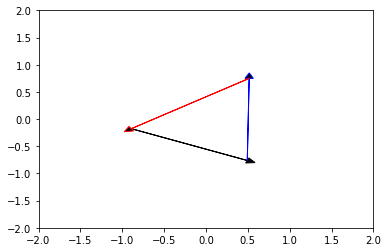

In [203]:
# Generate artificial data for rock paper scissors
# 0 = rock, 1 = scissors, 2 = paper
#
# simulate 3000 games per results in the paper

D = [(1,0,0,1000), (2,1,0,1000), (0,2,0,1000)]

# Train for rock paper scissors data
RPS = blade_chest(3,2, bias = False)
iterNum = 5000
alpha = 1e-4

for i in range(iterNum):
#     datapoint = np.random.randint(0,high = 3)
    playerA, playerB, na, nb = D[i%3]
    RPS.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Riemannian', reg = 1e-2)

model_plot(RPS, '../Figures/RPS_Riemannian.png')


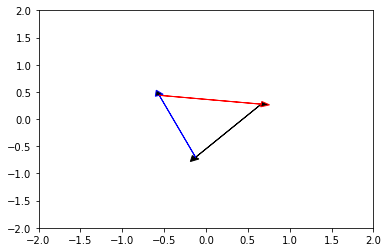

In [204]:
# Rock-Paper-Scissors with optimizing over single games
# 0 = rock, 1 = scissors, 2 = paper
#
# Create matchup data set D2
D2 = [(1,0,0,1), (2,1,0,1), (0,2,0,1)]

# Train for rock paper scissors data
RPS2 = blade_chest(3,2, bias = False)
iterNum = 5000
alpha = 1e-2

for i in range(iterNum):
#     datapoint = np.random.randint(0,high = 3)
    playerA, playerB, na, nb = D2[i%3]
    RPS2.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Riemannian', reg = 1e-3)


model_plot(RPS2, '../Figures/RPS2_Riemannian.png')


In [190]:
def model_plot2(model, filename):
    # for plotting rock-paper-scissors-lizard-spock models
    ax = plt.axes()
    ax.arrow(model.chests[0,0], model.chests[0,1], model.blades[0,0] - model.chests[0,0], 
             model.blades[0,1] - model.chests[0,1], fc="k", ec="k", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[1,0], model.chests[1,1], model.blades[1,0] - model.chests[1,0], 
             model.blades[1,1] - model.chests[1,1], fc="k", ec="b", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[2,0], model.chests[2,1], model.blades[2,0] - model.chests[2,0], 
             model.blades[2,1] - model.chests[2,1], fc="k", ec="r", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[3,0], model.chests[3,1], model.blades[3,0] - model.chests[3,0], 
             model.blades[3,1] - model.chests[3,1], fc="k", ec="g", head_width=0.1, head_length=0.1)
    ax.arrow(model.chests[4,0], model.chests[4,1], model.blades[4,0] - model.chests[4,0], 
             model.blades[4,1] - model.chests[4,1], fc="k", ec="m", head_width=0.1, head_length=0.1)
    ax.set_xlim([-2,2])
    ax.set_ylim([-2,2])
    plt.savefig(filename,dpi=200)
    plt.show()

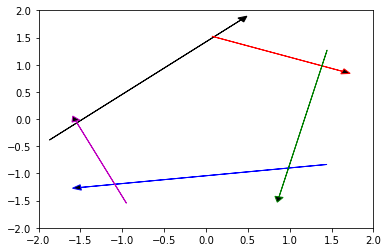

In [207]:
### Rock Paper Scissors Lizard Spock
# 
# From popular show "The Big Bang Theory"
# Rules outlined at: http://bigbangtheory.wikia.com/wiki/Rock_Paper_Scissors_Lizard_Spock?file=RPSLS.png

# Generate artificial data for rock paper scissors
# 0 = rock, 1 = paper, 2 = scissors, 3 = lizard, 4 = Spock 
#
# simulate 1000 games between each player per the paper

# Create matchup data set
D_spock = [(0,1,0,1000), (0,2,1000,0), (0,3,1000,0), (0,4,0,1000), (1,2,0,1000), (1,3,0,1000), (1,4,1000,0),
          (2,3,1000,0), (2,4,0,1000), (3,4,1000,0)]

# Run optimization on members of D
# Train for rock paper scissors data
RPSLS = blade_chest(5,2, bias = False)
iterNum = int(5e3)
alpha = 1e-4

for i in range(iterNum):
    datapoint = np.random.randint(0,high = 10)
    playerA, playerB, na, nb = D_spock[datapoint]
    RPSLS.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Euclidean', reg = 1e-2)


model_plot2(RPSLS, '../Figures/RPSLS_Euclidean.png')


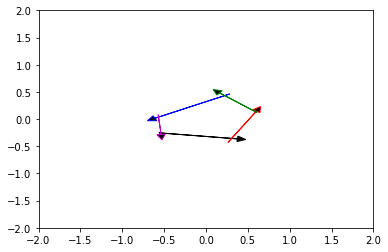

In [245]:
D_spock = [(0,1,0,1), (0,2,1,0), (0,3,1,0), (0,4,0,1), (1,2,0,1), (1,3,0,1), (1,4,1,0),
          (2,3,1,0), (2,4,0,1), (3,4,1,0)]

# Run optimization for individual games
# Train for rock paper scissors data
RPSLS2 = blade_chest(5,2, bias = False)
iterNum = int(1e4)
alpha = 5e-3

for i in range(iterNum):
    datapoint = np.random.randint(0,high = 10)
    playerA, playerB, na, nb = D_spock[datapoint]
    RPSLS2.SGD_optimizer(playerA, playerB, (na,nb), alpha, mode = 'Riemannian', reg = 1e-2)


model_plot2(RPSLS2, '../Figures/RPSLS2_Riemannian.png')

# Part B: DoTA Data
Data from popular video game *Defense of the Ancients*

In [247]:
# Load dataset
matchesDoTA_train, D_DoTA_train, matchesDoTA_test, D_DoTA_test = data_parse('../Datasets/dota/dota.txt', 757)

In [254]:
# Do optimization over set D

modes = ['Euclidean','Riemannian']
numPlayers = 757
numTrain = len(D_DoTA_train)
dims = [2, 5, 10, 25, 50, 100, 150, 200, 250, 300]
epochNum = 30
alpha = 1e-2
reg = 1e-2

train_acc_euc = np.zeros(len(dims))
test_acc_euc = np.zeros(len(dims))

train_acc_rie = np.zeros(len(dims))
test_acc_rie = np.zeros(len(dims))

for mode in modes:
    for j in range(len(dims)):
        DoTA = blade_chest(numPlayers, dims[j])
        for i in range(epochNum*numTrain):
            if modes == 'Riemannian' and (i < 10*numTrain):
                LR = alpha / 10
            else:
                LR = alpha
                
            datapoint = np.random.randint(0, high = numTrain)
            playerA, playerB, na, nb = D_DoTA_train[datapoint]
            DoTA.SGD_optimizer(playerA, playerB, (na,nb), LR, mode = mode, reg = reg)
        
        
        if mode=='Riemannian':
            train_acc_rie[j] = DoTA.accuracy(D_DoTA_train, mode = mode)
            test_acc_rie[j] = DoTA.accuracy(D_DoTA_test, mode = mode)
        else:
            train_acc_euc[j] = DoTA.accuracy(D_DoTA_train, mode = mode)
            test_acc_euc[j] = DoTA.accuracy(D_DoTA_test, mode = mode)
            

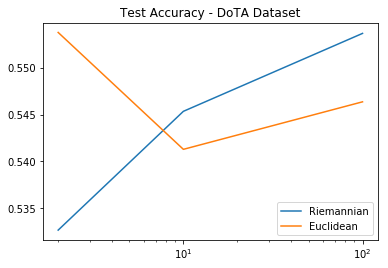

In [266]:
ax = plt.axes()
ax.semilogx([2,10,100], test_acc_rie, label='Riemannian')
ax.semilogx([2,10,100], test_acc_euc, label='Euclidean')
plt.title('Test Accuracy - DoTA Dataset')
plt.legend()
plt.show()


# Part C: Starcraft Datasets
Evaluated datasets for *StarCraft II: Wings of Liberty* and *StarCraft II: Heart of the Swarm*.

In [268]:
# Load dataset
matchesHoTS_train, D_HoTS_train, matchesHoTS_test, D_HoTS_test = data_parse('../Datasets/starcraft/HoTS.txt', 2287)

In [270]:
# Do optimization over set D

modes = ['Euclidean','Riemannian']
numPlayers = 2287
numTrain = len(D_HoTS_train)
dims = [2, 10, 50, 100]#[2, 5, 10, 25, 50, 100, 150, 200, 250, 300]
epochNum = 30
alpha = 5e-3
reg = 1e-1

train_acc_euc = np.zeros(len(dims))
test_acc_euc = np.zeros(len(dims))

train_acc_rie = np.zeros(len(dims))
test_acc_rie = np.zeros(len(dims))

for mode in modes:
    for j in range(len(dims)):
        HoTS = blade_chest(numPlayers, dims[j])
        for i in range(epochNum*numTrain):
            if modes == 'Riemannian' and (i < 10*numTrain):
                LR = alpha / 10
            else:
                LR = alpha
                
            datapoint = np.random.randint(0, high = numTrain)
            playerA, playerB, na, nb = D_HoTS_train[datapoint]
            HoTS.SGD_optimizer(playerA, playerB, (na,nb), LR, mode = mode, reg = reg)
        
        
        if mode=='Riemannian':
            train_acc_rie[j] = HoTS.accuracy(D_HoTS_train, mode = mode)
            test_acc_rie[j] = HoTS.accuracy(D_HoTS_test, mode = mode)
        else:
            train_acc_euc[j] = HoTS.accuracy(D_HoTS_train, mode = mode)
            test_acc_euc[j] = HoTS.accuracy(D_HoTS_test, mode = mode)
            

In [275]:
# Calculate naive prediction
train_acc_naive = np.zeros(len(dims))
test_acc_naive = np.zeros(len(dims))

for j in range(len(dims)):
    train_acc_naive[j] = naive_pred(D_HoTS_train)
    test_acc_naive[j] = naive_pred(D_HoTS_test)

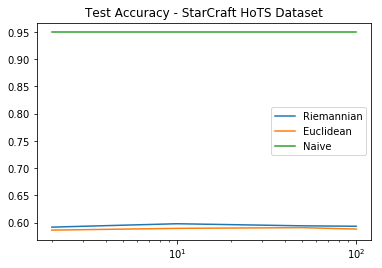

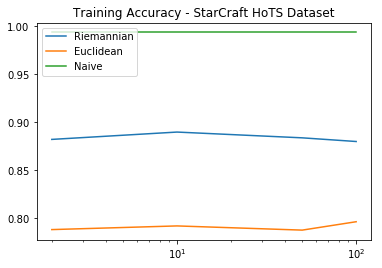

In [276]:
ax = plt.axes()
ax.semilogx(dims, test_acc_rie, label='Riemannian')
ax.semilogx(dims, test_acc_euc, label='Euclidean')
ax.semilogx(dims, test_acc_naive, label='Naive')
plt.title('Test Accuracy - StarCraft HoTS Dataset')
plt.legend()
plt.savefig('../Figures/HoTS_test_acc.png',dpi=300)
plt.show()

ax = plt.axes()
ax.semilogx(dims, train_acc_rie, label='Riemannian')
ax.semilogx(dims, train_acc_euc, label='Euclidean')
ax.semilogx(dims, train_acc_naive, label='Naive')
plt.title('Training Accuracy - StarCraft HoTS Dataset')
plt.legend()
plt.savefig('../Figures/HoTS_train_acc.png',dpi=300)
plt.show()
